In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Define the folder path of the FER2013 dataset
train_dir = "./datasets/train/"
test_dir = "./datasets/test/"
cadt_test_dir = "./cadt-test/"

In [3]:
# Mapping of class names to numeric labels
class_mapping = {
    "0": "Angry",
    "1": "Disgust",
    "2": "Fear",
    "3": "Happy",
    "4": "Neutral",
    "5": "Sad",
    "6": "Surprise"
}

In [4]:
def load_dataset(folder_path, class_mapping):
    """Load dataset and count images per class."""
    class_counts = {label: 0 for label in class_mapping.values()}
    image_data = []  # Store image metadata for further analysis

    for class_label, class_name in class_mapping.items():
        class_folder = os.path.join(folder_path, class_label)
        if os.path.exists(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                # Verify if the file is an image
                if img_name.endswith(('.png', '.jpg', '.jpeg')):
                    image_data.append({"path": img_path, "class": class_name})
                    class_counts[class_name] += 1

    return pd.DataFrame(image_data), class_counts

In [5]:
# Load train and test datasets
train_df, train_class_counts = load_dataset(train_dir, class_mapping)
test_df, test_class_counts = load_dataset(test_dir, class_mapping)
cadt_test_df, cadt_test_class_counts = load_dataset(cadt_test_dir, class_mapping)

/var/folders/jm/k0y0bh8d5nx0_d18d4pdzthr0000gn/T/ipykernel_8244/3781274468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette="viridis")


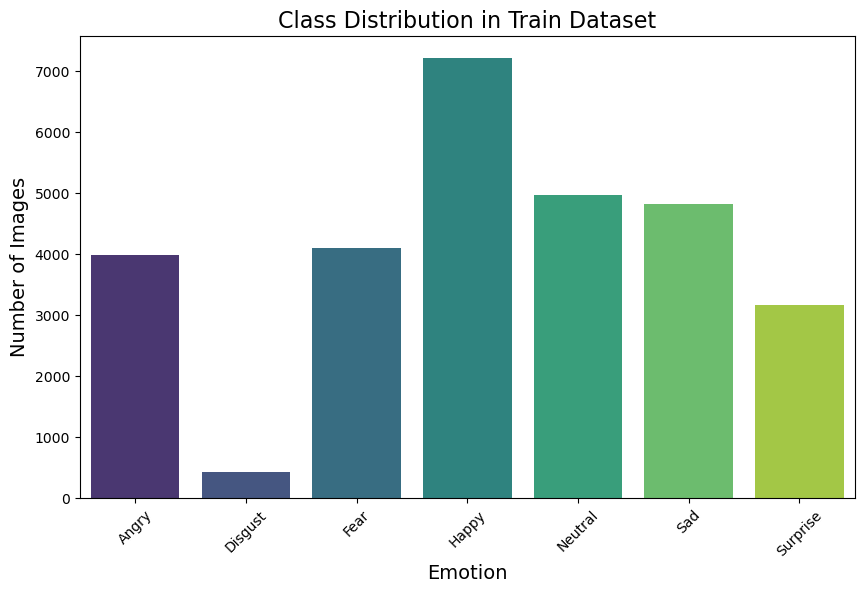

In [6]:
# Display class distribution for train dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette="viridis")
plt.title("Class Distribution in Train Dataset", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45)
plt.show()

/var/folders/jm/k0y0bh8d5nx0_d18d4pdzthr0000gn/T/ipykernel_8244/822338853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()), palette="viridis")


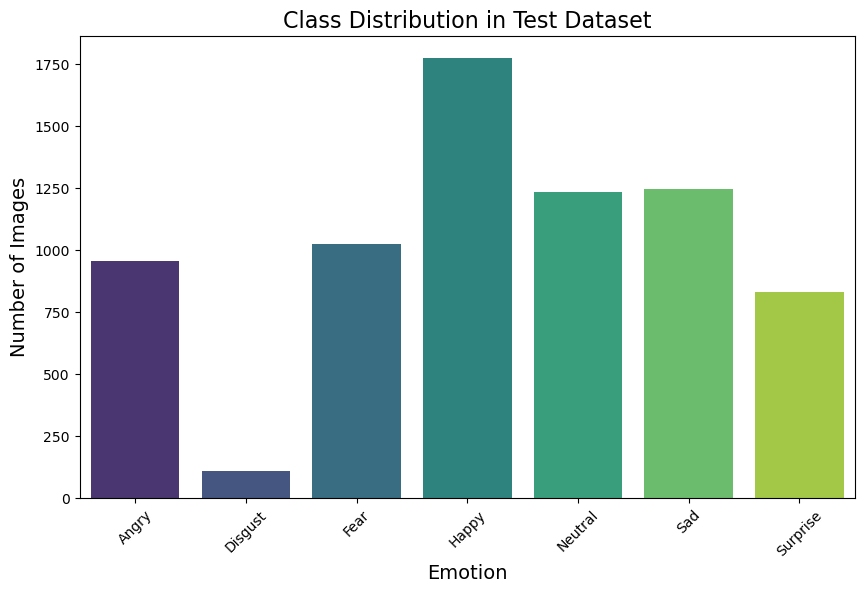

In [7]:
# Display class distribution for test dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()), palette="viridis")
plt.title("Class Distribution in Test Dataset", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45)
plt.show()

/var/folders/jm/k0y0bh8d5nx0_d18d4pdzthr0000gn/T/ipykernel_8244/2272213179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cadt_test_class_counts.keys()), y=list(cadt_test_class_counts.values()), palette="viridis")


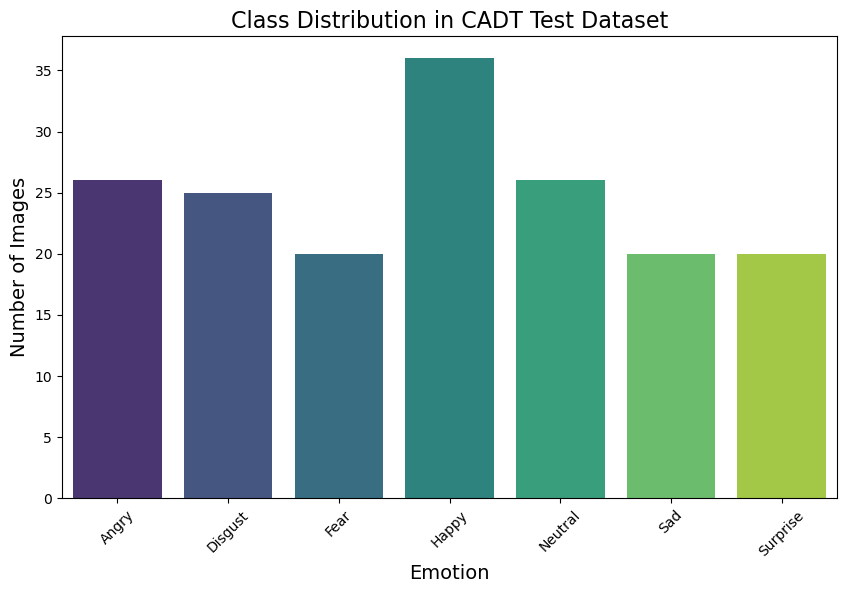

In [8]:
# Display class distribution for CADT test dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cadt_test_class_counts.keys()), y=list(cadt_test_class_counts.values()), palette="viridis")
plt.title("Class Distribution in CADT Test Dataset", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [9]:
# Display a few sample images per class
def plot_sample_images(df, class_mapping, samples_per_class=3, title="Sample Images"):
    plt.figure(figsize=(20, 10))
    for i, (class_label, class_name) in enumerate(class_mapping.items()):
        class_images = df[df['class'] == class_name].sample(samples_per_class, random_state=42)
        for j, img_row in enumerate(class_images.iterrows()):
            img = cv2.imread(img_row[1]['path'], cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48))  # FER2013 images are typically 48x48
            plt.subplot(len(class_mapping), samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if j == 1:
                plt.title(class_name, fontsize=14)
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

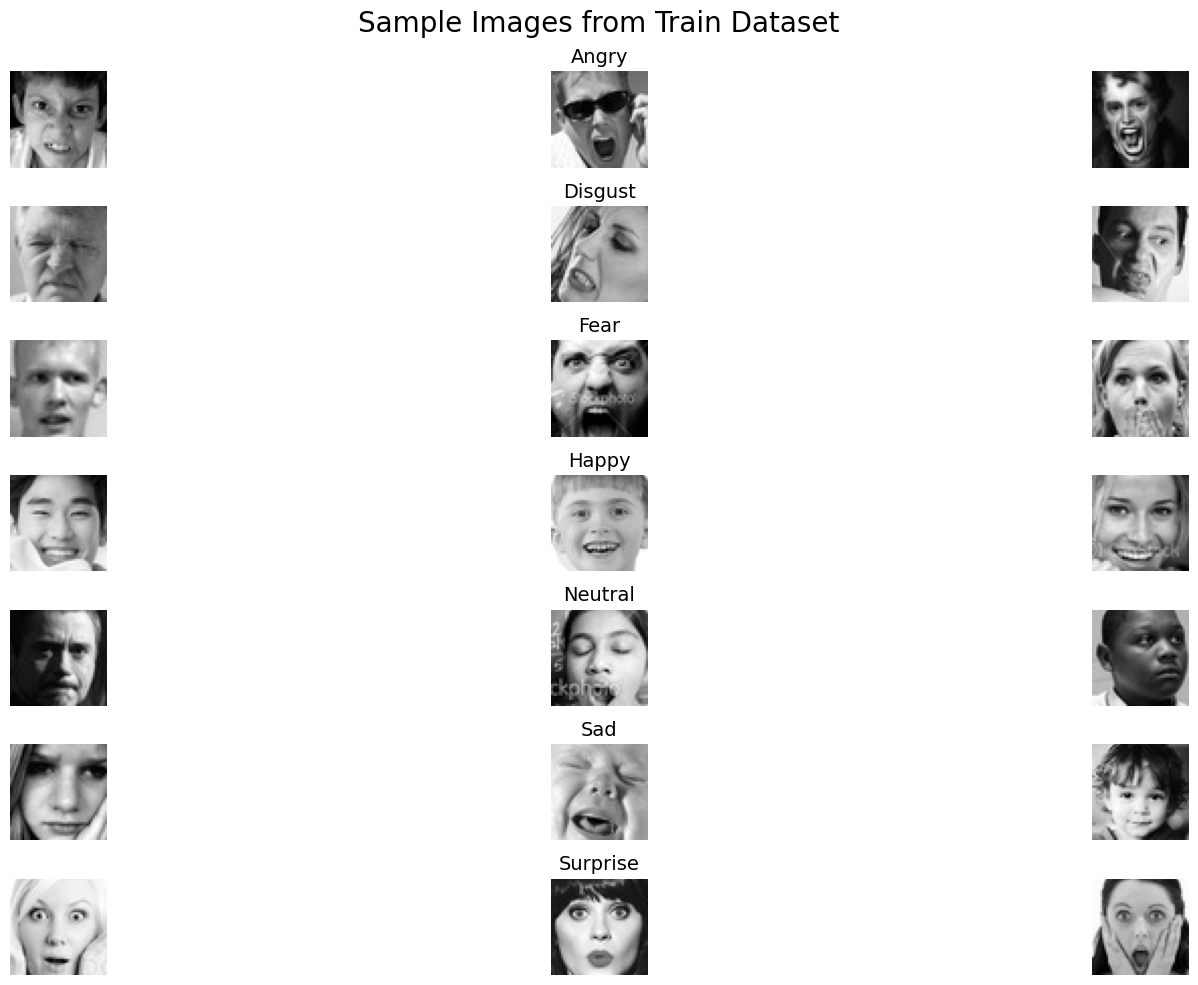

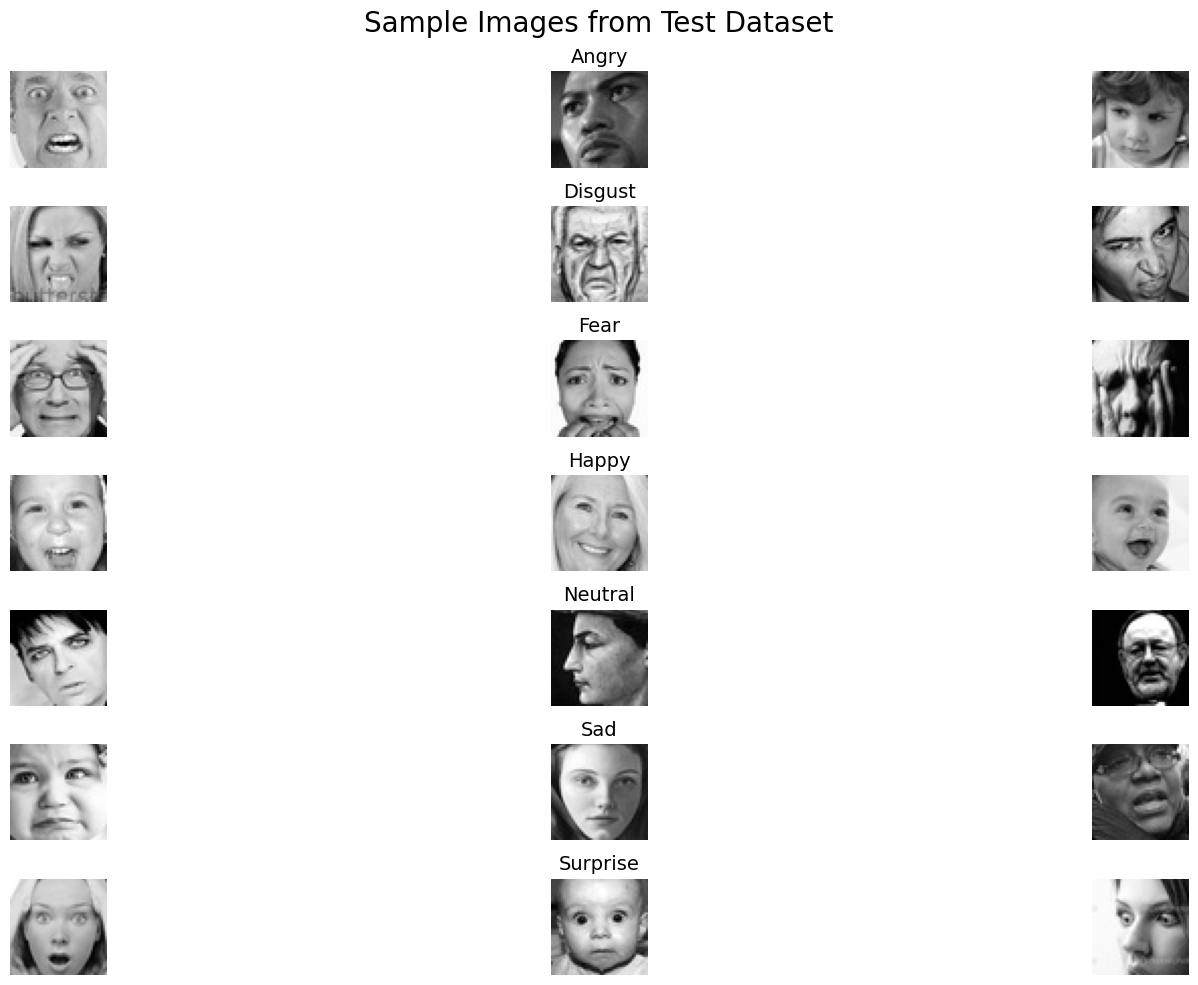

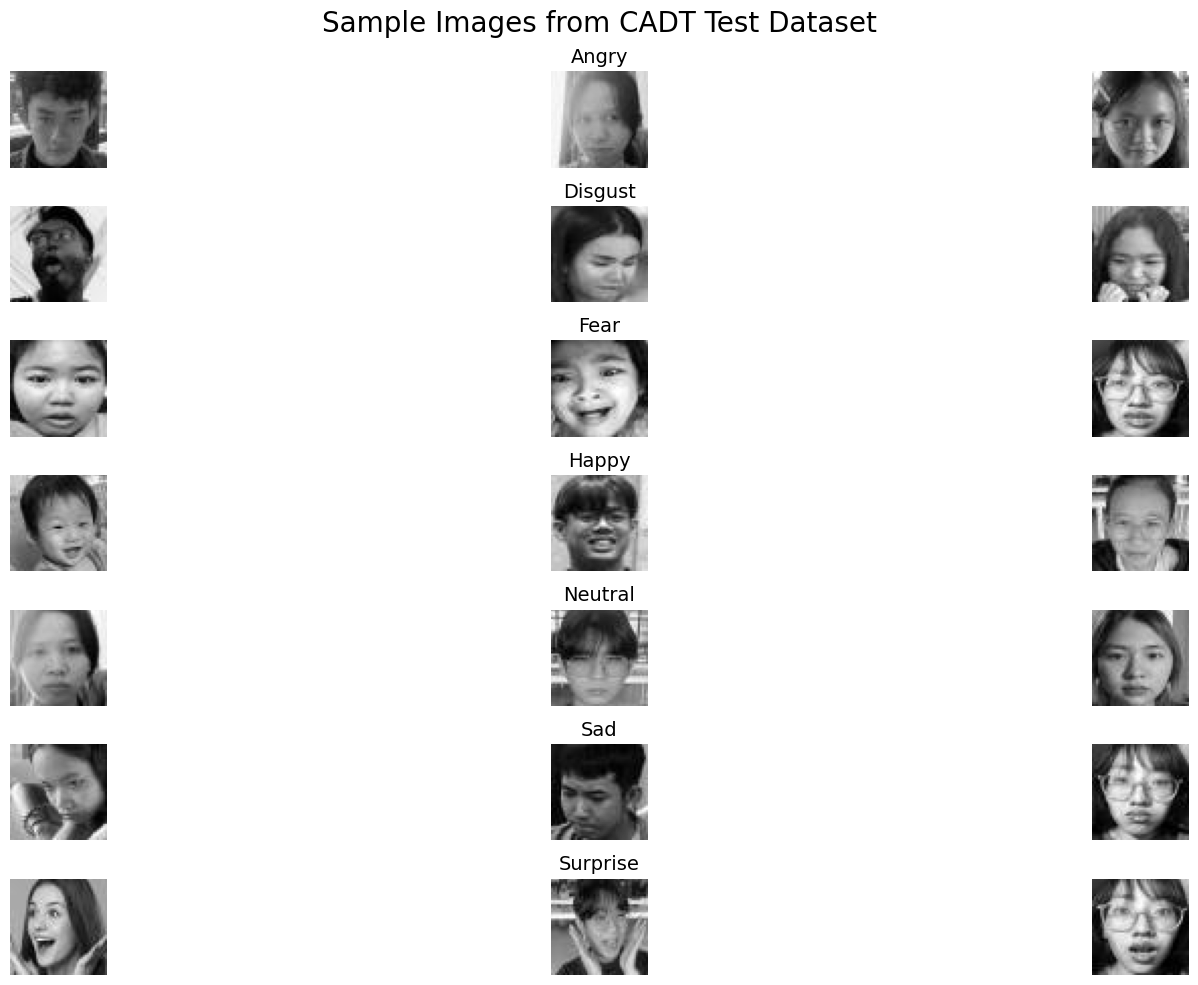

In [11]:
# Plot sample images for train dataset
plot_sample_images(train_df, class_mapping, title="Sample Images from Train Dataset")

# Plot sample images for test dataset
plot_sample_images(test_df, class_mapping, title="Sample Images from Test Dataset")

# Plot sample images for CADT test dataset
plot_sample_images(cadt_test_df, class_mapping, title="Sample Images from CADT Test Dataset")

In [12]:
# Basic statistics
print("Train Dataset:")
print("Total number of images:", len(train_df))
print("Class Distribution:")
print(train_df['class'].value_counts())

print("\nTest Dataset:")
print("Total number of images:", len(test_df))
print("Class Distribution:")
print(test_df['class'].value_counts())

print("\nCADT Test Dataset:")
print("Total number of images:", len(cadt_test_df))
print("Class Distribution:")
print(cadt_test_df['class'].value_counts())


Train Dataset:
Total number of images: 28709
Class Distribution:
class
Happy       7215
Neutral     4965
Sad         4830
Fear        4097
Angry       3995
Surprise    3171
Disgust      436
Name: count, dtype: int64

Test Dataset:
Total number of images: 7178
Class Distribution:
class
Happy       1774
Sad         1247
Neutral     1233
Fear        1024
Angry        958
Surprise     831
Disgust      111
Name: count, dtype: int64

CADT Test Dataset:
Total number of images: 173
Class Distribution:
class
Happy       36
Angry       26
Neutral     26
Disgust     25
Fear        20
Sad         20
Surprise    20
Name: count, dtype: int64
